<a href="https://colab.research.google.com/github/TonyQ2k3/pytorch-training/blob/main/exercises/exercise_day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise - Day 4

In [13]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [73]:
# Download helper function
import requests
from pathlib import Path

if Path("helper_functions.py").is_file() is not True:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [101]:
weight = 0.7
bias = 0.3
x = torch.arange(0, 1, 0.02, dtype=torch.float).unsqueeze(1)
y = weight * x + bias

In [102]:
# Creating datasets
split = int(0.8 * len(x))
x_train, y_train = x[:split], y[:split]
x_test, y_test = x[split:], y[split:]
print(x_train.shape)
print(y_train.shape)

torch.Size([40, 1])
torch.Size([40, 1])


In [112]:
regression_model = nn.Sequential(
    nn.Linear(1, 10),
    nn.Linear(10, 10),
    nn.Linear(10, 1)
)
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(regression_model.parameters(), lr=0.01)
epochs = 1000

In [94]:
def train_model(model, train_l, test_l):
  for epoch in range(epochs):
    model.train()

    y_logits = model(x_train)
    loss = loss_fn(y_logits, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
      test_logits = model(x_test)
      test_loss = loss_fn(test_logits, y_test)

    if epoch % 100 == 0:
      train_l.append(loss.item())
      test_l.append(test_loss.item())
      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

In [113]:
train_losses = []
test_losses = []

In [114]:
train_model(regression_model, train_losses, test_losses)

Epoch: 0 | Loss: 0.5901962518692017 | Test Loss: 0.8452304601669312
Epoch: 100 | Loss: 0.018779147416353226 | Test Loss: 0.04229648783802986
Epoch: 200 | Loss: 0.013728332705795765 | Test Loss: 0.050052594393491745
Epoch: 300 | Loss: 0.016098536550998688 | Test Loss: 0.04824785143136978
Epoch: 400 | Loss: 0.0135745108127594 | Test Loss: 0.05115106701850891
Epoch: 500 | Loss: 0.014682170934975147 | Test Loss: 0.04936503618955612
Epoch: 600 | Loss: 0.01689150743186474 | Test Loss: 0.050721485167741776
Epoch: 700 | Loss: 0.016322579234838486 | Test Loss: 0.05084938555955887
Epoch: 800 | Loss: 0.015791866928339005 | Test Loss: 0.047990769147872925
Epoch: 900 | Loss: 0.01590033806860447 | Test Loss: 0.04967101663351059


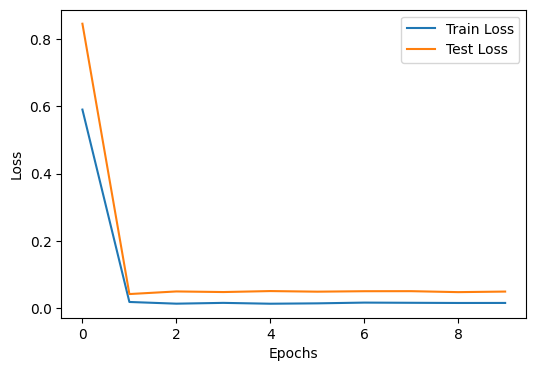

In [115]:
eps = [x for x in range(epochs//100)]
plt.figure(figsize=(6, 4))
plt.plot(eps, train_losses, label="Train Loss")
plt.plot(eps, test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

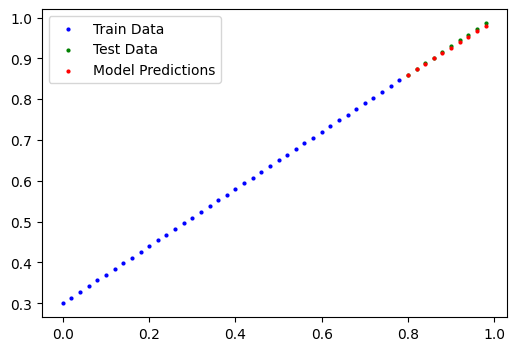

In [116]:
plt.figure(figsize=(6, 4))
plt.scatter(x_train, y_train, c='b', s=4, label="Train Data")
plt.scatter(x_test, y_test, c='g', s=4, label="Test Data")
with torch.inference_mode():
  y_preds = regression_model(x_test)
plt.scatter(x_test, y_preds, c ='r', s=4, label="Model Predictions")
plt.legend()
plt.show()